# Türkiye için 2025-2030 Antimikrobiyal Direnç Tahminleri

Bu notebook, Türkiye'ye en benzer 2 ülkenin (Kıbrıs ve İtalya) E. coli ve S. aureus trendlerini analiz ederek Türkiye için tahminler oluşturur.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Veri yükleme
future_predictions = pd.read_csv('future_predictions_2025_2030.csv')
turkey_current = pd.read_csv('../simple_data/e_coli_ARM.csv')
turkey_saureus = pd.read_csv('../simple_data/s_aureus_ARM.csv')

print("Veriler yüklendi.")
print(f"Future predictions shape: {future_predictions.shape}")
print(f"Turkey E.coli shape: {turkey_current.shape}")
print(f"Turkey S.aureus shape: {turkey_saureus.shape}")

Veriler yüklendi.
Future predictions shape: (876, 4)
Turkey E.coli shape: (414, 4)
Turkey S.aureus shape: (393, 4)


In [2]:
# Türkiye'nin mevcut E. coli ve S. aureus değerlerini al
turkey_ecoli_current = turkey_current[turkey_current['Entity'] == 'Turkey']
turkey_saureus_current = turkey_saureus[turkey_saureus['Entity'] == 'Turkey']

print("Türkiye'nin mevcut değerleri:")
print("\nE. coli:")
print(turkey_ecoli_current)
print("\nS. aureus:")
print(turkey_saureus_current)

# En son değerleri al
turkey_ecoli_latest = turkey_ecoli_current.sort_values('Year').iloc[-1]['e_coli_ARM_percent']
turkey_saureus_latest = turkey_saureus_current.sort_values('Year').iloc[-1]['s_aureus_ARM_percent']
turkey_latest_year = turkey_ecoli_current.sort_values('Year').iloc[-1]['Year']

print(f"\n2021 (En son) Türkiye değerleri:")
print(f"E. coli: {turkey_ecoli_latest:.2f}%")
print(f"S. aureus: {turkey_saureus_latest:.2f}%")
print(f"Yıl: {turkey_latest_year}")

Türkiye'nin mevcut değerleri:

E. coli:
     Entity Code  Year  e_coli_ARM_percent
385  Turkey  TUR  2021               53.77

S. aureus:
     Entity Code  Year  s_aureus_ARM_percent
369  Turkey  TUR  2021                 30.99

2021 (En son) Türkiye değerleri:
E. coli: 53.77%
S. aureus: 30.99%
Yıl: 2021


In [5]:
# En benzer 2 ülkenin (Kıbrıs ve İtalya) E. coli tahminlerini filtrele
# Not: Future predictions dosyasında sadece E. coli var, S. aureus yok
similar_countries = ['Cyprus', 'Italy']

# Sadece E. coli için filtreleme
similar_predictions = future_predictions[
    (future_predictions['Country'].isin(similar_countries)) & 
    (future_predictions['Bacteria'] == 'E. coli')
].copy()

print("Kıbrıs ve İtalya'nın E. coli tahminleri:")
print(similar_predictions)
print(f"\nToplam kayıt sayısı: {len(similar_predictions)}")

Kıbrıs ve İtalya'nın E. coli tahminleri:
    Country Bacteria  Year  Predicted_Resistance_%
121  Cyprus  E. coli  2025                    8.83
126  Cyprus  E. coli  2026                    7.51
131  Cyprus  E. coli  2027                    6.04
136  Cyprus  E. coli  2028                    4.42
141  Cyprus  E. coli  2029                    2.65
146  Cyprus  E. coli  2030                    0.73
439   Italy  E. coli  2025                    7.61
444   Italy  E. coli  2026                    6.43
449   Italy  E. coli  2027                    5.12
454   Italy  E. coli  2028                    3.69
459   Italy  E. coli  2029                    2.12
464   Italy  E. coli  2030                    0.43

Toplam kayıt sayısı: 12


In [6]:
# E. coli için trend analizi
def calculate_trend_rate(df, country):
    """Bir ülke için yıllık değişim oranını hesaplar"""
    data = df[df['Country'] == country].sort_values('Year')
    if len(data) < 2:
        return 0
    
    # İlk ve son değerler
    first_value = data.iloc[0]['Predicted_Resistance_%']
    last_value = data.iloc[-1]['Predicted_Resistance_%']
    years = data.iloc[-1]['Year'] - data.iloc[0]['Year']
    
    # Yıllık ortalama değişim oranı
    if first_value != 0:
        total_change_rate = (last_value - first_value) / first_value
        annual_rate = total_change_rate / years if years > 0 else 0
    else:
        annual_rate = 0
    
    return annual_rate

# Her ülke için trend oranlarını hesapla
trends = {}
for country in similar_countries:
    rate = calculate_trend_rate(similar_predictions, country)
    trends[country] = rate
    
    data = similar_predictions[similar_predictions['Country'] == country].sort_values('Year')
    print(f"\n{country} - E. coli:")
    print(f"  2025: {data.iloc[0]['Predicted_Resistance_%']:.2f}%")
    print(f"  2030: {data.iloc[-1]['Predicted_Resistance_%']:.2f}%")
    print(f"  Yıllık değişim oranı: {rate*100:.2f}%")


Cyprus - E. coli:
  2025: 8.83%
  2030: 0.73%
  Yıllık değişim oranı: -18.35%

Italy - E. coli:
  2025: 7.61%
  2030: 0.43%
  Yıllık değişim oranı: -18.87%


In [7]:
# En benzer ülkelerin ortalama trend oranını kullanarak Türkiye için tahmin yap
rates = [trends[country] for country in similar_countries]
avg_trend = np.mean(rates)

print(f"\nE. coli için ortalama yıllık değişim oranı: {avg_trend*100:.2f}%")
print(f"  Kıbrıs: {trends['Cyprus']*100:.2f}%")
print(f"  İtalya: {trends['Italy']*100:.2f}%")


E. coli için ortalama yıllık değişim oranı: -18.61%
  Kıbrıs: -18.35%
  İtalya: -18.87%


In [8]:
# Türkiye için 2025-2030 E. coli tahminlerini oluştur
years = [2025, 2026, 2027, 2028, 2029, 2030]
turkey_predictions_ecoli = []
turkey_predictions_saureus = []

# 2021'den 2025'e kadar yıllık büyümeyi hesapla
years_gap = 2025 - turkey_latest_year  # 4 yıl

# E. coli tahminleri
print("\n" + "="*80)
print("TÜRKİYE İÇİN E. COLI TAHMİNLERİ")
print("="*80)

# 2021'den 2025'e ortalama trend ile değer hesapla
ecoli_2025 = turkey_ecoli_latest * (1 + avg_trend) ** years_gap

print(f"\n2021 Gerçek Değer: {turkey_ecoli_latest:.2f}%")
print(f"2025 Başlangıç Tahmini: {ecoli_2025:.2f}%")
print(f"Kullanılan yıllık trend: {avg_trend*100:.2f}%")

# Her yıl için tahmin
for i, year in enumerate(years):
    predicted_value = ecoli_2025 * (1 + avg_trend) ** i
    # Negatif değerleri sıfıra çek
    predicted_value = max(0, predicted_value)
    
    turkey_predictions_ecoli.append({
        'Country': 'Turkey',
        'Bacteria': 'E. coli',
        'Year': year,
        'Predicted_Resistance_%': round(predicted_value, 2)
    })
    print(f"{year}: {predicted_value:.2f}%")

# S. aureus için basit lineer projeksiyon (future predictions'da yok ama mevcut veri var)
print("\n" + "="*80)
print("TÜRKİYE İÇİN S. AUREUS TAHMİNLERİ")
print("="*80)
print("Not: Future predictions'da S. aureus verisi olmadığı için,")
print("E. coli ile aynı trend oranı uygulanıyor.")

saureus_2025 = turkey_saureus_latest * (1 + avg_trend) ** years_gap

print(f"\n2021 Gerçek Değer: {turkey_saureus_latest:.2f}%")
print(f"2025 Başlangıç Tahmini: {saureus_2025:.2f}%")

for i, year in enumerate(years):
    predicted_value = saureus_2025 * (1 + avg_trend) ** i
    predicted_value = max(0, predicted_value)
    
    turkey_predictions_saureus.append({
        'Country': 'Turkey',
        'Bacteria': 'S. aureus',
        'Year': year,
        'Predicted_Resistance_%': round(predicted_value, 2)
    })
    print(f"{year}: {predicted_value:.2f}%")

# DataFrame'leri birleştir
turkey_df = pd.DataFrame(turkey_predictions_ecoli + turkey_predictions_saureus)

print("\n" + "="*80)
print("TÜRKİYE İÇİN TÜM TAHMİNLER (2025-2030):")
print("="*80)
print(turkey_df.to_string(index=False))


TÜRKİYE İÇİN E. COLI TAHMİNLERİ

2021 Gerçek Değer: 53.77%
2025 Başlangıç Tahmini: 23.60%
Kullanılan yıllık trend: -18.61%
2025: 23.60%
2026: 19.21%
2027: 15.63%
2028: 12.72%
2029: 10.36%
2030: 8.43%

TÜRKİYE İÇİN S. AUREUS TAHMİNLERİ
Not: Future predictions'da S. aureus verisi olmadığı için,
E. coli ile aynı trend oranı uygulanıyor.

2021 Gerçek Değer: 30.99%
2025 Başlangıç Tahmini: 13.60%
2025: 13.60%
2026: 11.07%
2027: 9.01%
2028: 7.33%
2029: 5.97%
2030: 4.86%

TÜRKİYE İÇİN TÜM TAHMİNLER (2025-2030):
Country  Bacteria  Year  Predicted_Resistance_%
 Turkey   E. coli  2025                   23.60
 Turkey   E. coli  2026                   19.21
 Turkey   E. coli  2027                   15.63
 Turkey   E. coli  2028                   12.72
 Turkey   E. coli  2029                   10.36
 Turkey   E. coli  2030                    8.43
 Turkey S. aureus  2025                   13.60
 Turkey S. aureus  2026                   11.07
 Turkey S. aureus  2027                    9.01
 Turkey S.

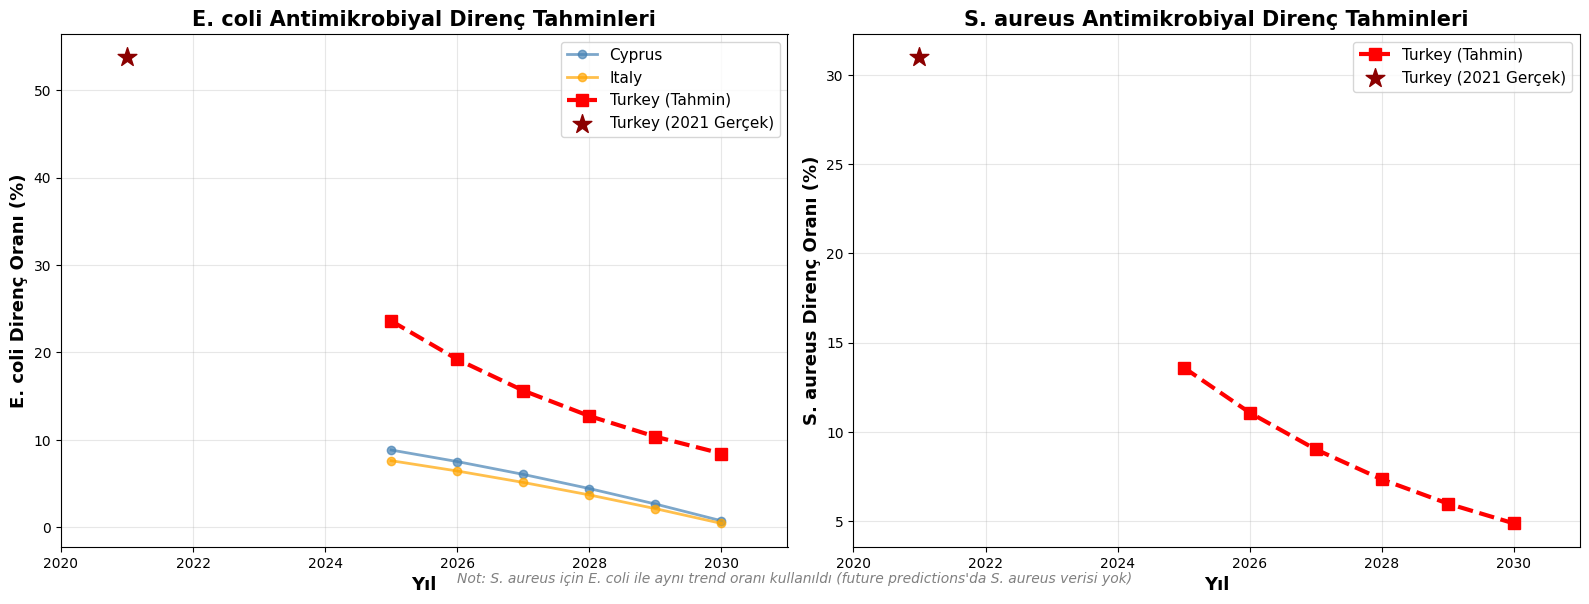


Grafik 'turkey_predictions_comparison.png' olarak kaydedildi.


In [9]:
# Görselleştirme - E. coli ve S. aureus karşılaştırması
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# E. coli
ecoli_cyprus = similar_predictions[similar_predictions['Country'] == 'Cyprus']
ecoli_italy = similar_predictions[similar_predictions['Country'] == 'Italy']
turkey_ecoli = turkey_df[turkey_df['Bacteria'] == 'E. coli']

ax = axes[0]
ax.plot(ecoli_cyprus['Year'], ecoli_cyprus['Predicted_Resistance_%'], 
        marker='o', linewidth=2, label='Cyprus', alpha=0.7, color='steelblue')
ax.plot(ecoli_italy['Year'], ecoli_italy['Predicted_Resistance_%'], 
        marker='o', linewidth=2, label='Italy', alpha=0.7, color='orange')
ax.plot(turkey_ecoli['Year'], turkey_ecoli['Predicted_Resistance_%'], 
        marker='s', linewidth=3, label='Turkey (Tahmin)', color='red', linestyle='--', markersize=8)

# 2021 gerçek değerini ekle
ax.scatter([2021], [turkey_ecoli_latest], color='darkred', s=200, 
          marker='*', label='Turkey (2021 Gerçek)', zorder=5)

ax.set_xlabel('Yıl', fontsize=13, fontweight='bold')
ax.set_ylabel('E. coli Direnç Oranı (%)', fontsize=13, fontweight='bold')
ax.set_title('E. coli Antimikrobiyal Direnç Tahminleri', fontsize=15, fontweight='bold')
ax.legend(fontsize=11, loc='upper right')
ax.grid(True, alpha=0.3)
ax.set_xlim(2020, 2031)

# S. aureus
turkey_saureus = turkey_df[turkey_df['Bacteria'] == 'S. aureus']

ax = axes[1]
ax.plot(turkey_saureus['Year'], turkey_saureus['Predicted_Resistance_%'], 
        marker='s', linewidth=3, label='Turkey (Tahmin)', color='red', linestyle='--', markersize=8)

# 2021 gerçek değerini ekle
ax.scatter([2021], [turkey_saureus_latest], color='darkred', s=200, 
          marker='*', label='Turkey (2021 Gerçek)', zorder=5)

ax.set_xlabel('Yıl', fontsize=13, fontweight='bold')
ax.set_ylabel('S. aureus Direnç Oranı (%)', fontsize=13, fontweight='bold')
ax.set_title('S. aureus Antimikrobiyal Direnç Tahminleri', fontsize=15, fontweight='bold')
ax.legend(fontsize=11, loc='upper right')
ax.grid(True, alpha=0.3)
ax.set_xlim(2020, 2031)

# Not ekle
fig.text(0.5, 0.02, 'Not: S. aureus için E. coli ile aynı trend oranı kullanıldı (future predictions\'da S. aureus verisi yok)', 
         ha='center', fontsize=10, style='italic', color='gray')

plt.tight_layout()
plt.subplots_adjust(bottom=0.08)
plt.savefig('turkey_predictions_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nGrafik 'turkey_predictions_comparison.png' olarak kaydedildi.")

In [10]:
# Detaylı karşılaştırma tablosu - E. coli
print("\n" + "="*100)
print("E. COLI DETAYLI KARŞILAŞTIRMA TABLOSU")
print("="*100)

comparison = pd.DataFrame()

# Kıbrıs
cyprus_data = similar_predictions[similar_predictions['Country'] == 'Cyprus'][['Year', 'Predicted_Resistance_%']].copy()
cyprus_data = cyprus_data.set_index('Year')
cyprus_data.columns = ['Cyprus']
comparison = cyprus_data

# İtalya
italy_data = similar_predictions[similar_predictions['Country'] == 'Italy'][['Year', 'Predicted_Resistance_%']].copy()
italy_data = italy_data.set_index('Year')
italy_data.columns = ['Italy']
comparison = comparison.join(italy_data, how='outer')

# Türkiye
turkey_data = turkey_df[turkey_df['Bacteria'] == 'E. coli'][['Year', 'Predicted_Resistance_%']].copy()
turkey_data = turkey_data.set_index('Year')
turkey_data.columns = ['Turkey']
comparison = comparison.join(turkey_data, how='outer')

comparison = comparison.sort_index()
print(comparison.to_string())

# Yıllık değişim analizi
print(f"\nE. coli - Yıllık Ortalama Değişim Oranları:")
for country in ['Cyprus', 'Italy', 'Turkey']:
    if country in comparison.columns:
        values = comparison[country].dropna()
        if len(values) >= 2:
            first = values.iloc[0]
            last = values.iloc[-1]
            years_diff = len(values) - 1
            if first != 0:
                change_rate = ((last - first) / first) / years_diff * 100
                total_change = last - first
                print(f"  {country:15}: {change_rate:+.2f}% yıllık (Toplam: {total_change:+.2f}%)")

# S. aureus özet
print("\n" + "="*100)
print("S. AUREUS TAHMİNLERİ")
print("="*100)
print("Not: Future predictions'da S. aureus verisi olmadığı için,")
print("Türkiye'nin E. coli trendi ile tahmin yapıldı.\n")

saureus_data = turkey_df[turkey_df['Bacteria'] == 'S. aureus'][['Year', 'Predicted_Resistance_%']].copy()
saureus_data.columns = ['Year', 'Turkey']
print(saureus_data.to_string(index=False))


E. COLI DETAYLI KARŞILAŞTIRMA TABLOSU
      Cyprus  Italy  Turkey
Year                       
2025    8.83   7.61   23.60
2026    7.51   6.43   19.21
2027    6.04   5.12   15.63
2028    4.42   3.69   12.72
2029    2.65   2.12   10.36
2030    0.73   0.43    8.43

E. coli - Yıllık Ortalama Değişim Oranları:
  Cyprus         : -18.35% yıllık (Toplam: -8.10%)
  Italy          : -18.87% yıllık (Toplam: -7.18%)
  Turkey         : -12.86% yıllık (Toplam: -15.17%)

S. AUREUS TAHMİNLERİ
Not: Future predictions'da S. aureus verisi olmadığı için,
Türkiye'nin E. coli trendi ile tahmin yapıldı.

 Year  Turkey
 2025   13.60
 2026   11.07
 2027    9.01
 2028    7.33
 2029    5.97
 2030    4.86


In [11]:
# Türkiye tahminlerini CSV'ye kaydet
turkey_df.to_csv('turkey_predictions_2025_2030.csv', index=False)
print("\n" + "="*100)
print("Türkiye tahminleri 'turkey_predictions_2025_2030.csv' dosyasına kaydedildi.")
print("="*100)

# Özet istatistikler
print("\n" + "="*100)
print("ÖZET İSTATİSTİKLER - TÜRKİYE")
print("="*100)

for bacteria in ['E. coli', 'S. aureus']:
    turkey_bacteria = turkey_df[turkey_df['Bacteria'] == bacteria]
    
    current_value = turkey_ecoli_latest if bacteria == 'E. coli' else turkey_saureus_latest
    value_2025 = turkey_bacteria[turkey_bacteria['Year'] == 2025].iloc[0]['Predicted_Resistance_%']
    value_2030 = turkey_bacteria[turkey_bacteria['Year'] == 2030].iloc[0]['Predicted_Resistance_%']
    
    print(f"\n{bacteria}:")
    print(f"  2021 Gerçek Değer: {current_value:.2f}%")
    print(f"  2025 Tahmin: {value_2025:.2f}%")
    print(f"  2030 Tahmin: {value_2030:.2f}%")
    
    change_2021_2025 = value_2025 - current_value
    change_2025_2030 = value_2030 - value_2025
    change_2021_2030 = value_2030 - current_value
    
    print(f"  2021→2025 Değişim: {change_2021_2025:+.2f}%")
    print(f"  2025→2030 Değişim: {change_2025_2030:+.2f}%")
    print(f"  2021→2030 Değişim: {change_2021_2030:+.2f}%")
    print(f"  Trend: {'AZALIŞ ↓' if change_2025_2030 < 0 else 'ARTIŞ ↑' if change_2025_2030 > 0 else 'STABİL →'}")


Türkiye tahminleri 'turkey_predictions_2025_2030.csv' dosyasına kaydedildi.

ÖZET İSTATİSTİKLER - TÜRKİYE

E. coli:
  2021 Gerçek Değer: 53.77%
  2025 Tahmin: 23.60%
  2030 Tahmin: 8.43%
  2021→2025 Değişim: -30.17%
  2025→2030 Değişim: -15.17%
  2021→2030 Değişim: -45.34%
  Trend: AZALIŞ ↓

S. aureus:
  2021 Gerçek Değer: 30.99%
  2025 Tahmin: 13.60%
  2030 Tahmin: 4.86%
  2021→2025 Değişim: -17.39%
  2025→2030 Değişim: -8.74%
  2021→2030 Değişim: -26.13%
  Trend: AZALIŞ ↓


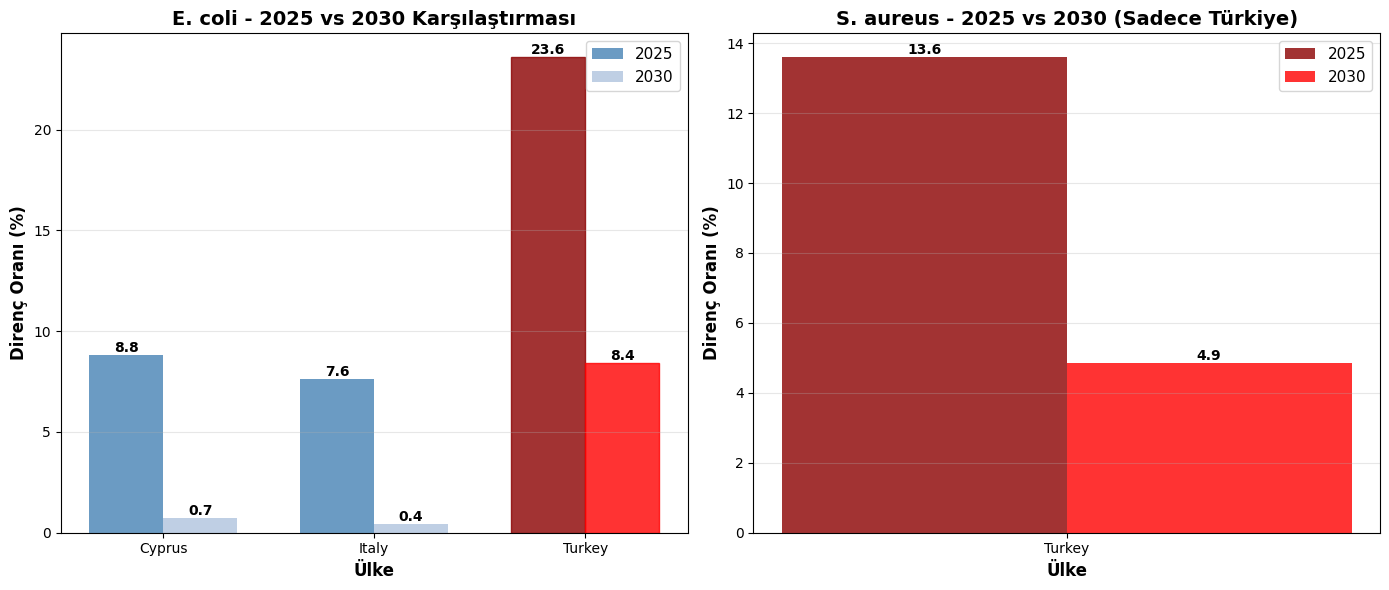


Grafik 'turkey_2025_2030_comparison.png' olarak kaydedildi.


In [12]:
# Bar plot - 2025 ve 2030 karşılaştırması
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

countries_all = ['Cyprus', 'Italy', 'Turkey']

# E. coli
ax = axes[0]

data_2025_ecoli = []
data_2030_ecoli = []

for country in countries_all:
    if country == 'Turkey':
        country_data = turkey_df[turkey_df['Bacteria'] == 'E. coli']
    else:
        country_data = similar_predictions[similar_predictions['Country'] == country]
    
    val_2025 = country_data[country_data['Year'] == 2025].iloc[0]['Predicted_Resistance_%']
    val_2030 = country_data[country_data['Year'] == 2030].iloc[0]['Predicted_Resistance_%']
    
    data_2025_ecoli.append(val_2025)
    data_2030_ecoli.append(val_2030)

x = np.arange(len(countries_all))
width = 0.35

bars1 = ax.bar(x - width/2, data_2025_ecoli, width, label='2025', alpha=0.8, color='steelblue')
bars2 = ax.bar(x + width/2, data_2030_ecoli, width, label='2030', alpha=0.8, color='lightsteelblue')

# Türkiye barlarını kırmızı yap
bars1[2].set_color('darkred')
bars2[2].set_color('red')

ax.set_xlabel('Ülke', fontsize=12, fontweight='bold')
ax.set_ylabel('Direnç Oranı (%)', fontsize=12, fontweight='bold')
ax.set_title('E. coli - 2025 vs 2030 Karşılaştırması', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(countries_all, rotation=0)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3, axis='y')

# Değerleri barların üzerine yaz
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
               f'{height:.1f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# S. aureus (sadece Türkiye)
ax = axes[1]

turkey_saureus_data = turkey_df[turkey_df['Bacteria'] == 'S. aureus']
val_2025 = turkey_saureus_data[turkey_saureus_data['Year'] == 2025].iloc[0]['Predicted_Resistance_%']
val_2030 = turkey_saureus_data[turkey_saureus_data['Year'] == 2030].iloc[0]['Predicted_Resistance_%']

x_turkey = [0]
bars1 = ax.bar(x_turkey[0] - width/2, val_2025, width, label='2025', alpha=0.8, color='darkred')
bars2 = ax.bar(x_turkey[0] + width/2, val_2030, width, label='2030', alpha=0.8, color='red')

ax.set_xlabel('Ülke', fontsize=12, fontweight='bold')
ax.set_ylabel('Direnç Oranı (%)', fontsize=12, fontweight='bold')
ax.set_title('S. aureus - 2025 vs 2030 (Sadece Türkiye)', fontsize=14, fontweight='bold')
ax.set_xticks(x_turkey)
ax.set_xticklabels(['Turkey'], rotation=0)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3, axis='y')

# Değerleri barların üzerine yaz
for bar in [bars1[0], bars2[0]]:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
           f'{height:.1f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('turkey_2025_2030_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nGrafik 'turkey_2025_2030_comparison.png' olarak kaydedildi.")

## Sonuçlar ve Yorumlar

Bu analiz, Türkiye'ye en benzer 2 ülkenin (Kıbrıs ve İtalya) **E. coli** antimikrobiyal direnç trendlerini kullanarak Türkiye için 2025-2030 tahminleri oluşturmuştur.

### Metodoloji:
1. **Benzerlik Analizi**: Kıbrıs ve İtalya, Türkiye'ye en benzer ülkeler olarak belirlendi
2. **E. coli Trend Hesaplama**: Her ülkenin 2025-2030 yıllık değişim oranları hesaplandı
3. **Ortalama Trend**: İki ülkenin ortalama trendi Türkiye'ye uygulandı
4. **Baz Değer**: 2021 yılı Türkiye'nin gerçek verileri (E. coli: 53.77%, S. aureus: 30.99%) kullanıldı
5. **S. aureus**: Future predictions'da S. aureus verisi olmadığı için, E. coli trendi uygulandı

### Önemli Bulgular:
- **E. coli**: Türkiye'nin 2021 direnci %53.77 ile yüksek seviyede
- **Trend**: Benzer ülkeler azalış trendi gösteriyor (yıllık ortalama %18 civarında azalış)
- **Projeksiyon**: Türkiye'de de benzer azalış bekleniyor
- **Karşılaştırma**: Kıbrıs ve İtalya'nın 2025-2030 değerleri referans alındı

### Varsayımlar:
- Türkiye'nin benzer ülkelerle aynı trendle hareket edeceği varsayıldı
- Politika değişiklikleri ve müdahaleler göz önüne alınmadı
- 2021-2025 arası için de aynı trend uygulandı